# Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install libraries

# Import Libraries

In [6]:
#Load the required libraries

import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
# import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-darkgrid')


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import joblib


# import prophet
# from prophet import Prophet
# from prophet.plot import plot_plotly, plot_components_plotly
# from prophet.plot import add_changepoints_to_plot

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# import xgboost as xgb
# from xgboost import plot_importance, plot_tree

# import tensorflow as tf
# from keras.models import Sequential,load_model
# from keras.layers import Dropout, Dense, LSTM, GRU
# from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler


from pylab import rcParams
rcParams['figure.figsize'] = 14, 8


# from matplotlib import rc

# sns.set(style='whitegrid', palette='muted', font_scale=1.5)

# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)

# Import Data

In [7]:
data_ETH = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Project_Data/binance/ETHUSDT_merged.csv")

In [8]:
data_ETH.head()

,open_time,open,high,low,close,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


Here's a breakdown of each feature:

- **open_time**: This represents the opening time of a specific period in Unix time format. Unix time is a way to represent time as the number of seconds that have elapsed since January 1, 1970.

- **open**: This refers to the opening price of the trading instrument at the given period.

- **high**: This represents the highest price reached by the trading instrument during the specified period.

- **low**: This denotes the lowest price reached by the trading instrument during the specified period.

- **close**: This indicates the closing price of the trading instrument at the given period.

- **volume**: This refers to the total volume, typically the quantity of the trading instrument, traded during the specified period.

- **close_time**: This represents the closing time of the specific period in Unix time format.

- **quote_volume**: This refers to the total volume in terms of the quote asset. The quote asset is the asset used to determine the value of the trading instrument.

- **count**: This represents the number of trades that occurred during the specified period.

- **taker_buy_volume**: This denotes the volume of the quote asset bought by takers (market takers) during the specified period.

- **taker_buy_quote_volume**: This represents the volume of the base asset bought by takers (market takers) during the specified period.

In [9]:
# Renaming the columns to match the name in the previous notebook with bitstamp data so that I do not have to change the whole code
data_ETH.rename(columns = {'open_time':'date', 'volume':'Volume'}, inplace = True)

In [10]:
data_ETH.head()

,date,open,high,low,close,Volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,2019-09-01 00:59:59.999,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,2019-09-01 01:59:59.999,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,2019-09-01 02:59:59.999,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,2019-09-01 03:59:59.999,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,2019-09-01 04:59:59.999,4.476401e+05,2848,1524.31952,262782.612091


In [11]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    32821 non-null  object 
 1   open                    32821 non-null  float64
 2   high                    32821 non-null  float64
 3   low                     32821 non-null  float64
 4   close                   32821 non-null  float64
 5   Volume                  32821 non-null  float64
 6   close_time              32821 non-null  object 
 7   quote_volume            32821 non-null  float64
 8   count                   32821 non-null  int64  
 9   taker_buy_volume        32821 non-null  float64
 10  taker_buy_quote_volume  32821 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
# Removing close time column

data_ETH = data_ETH.drop(columns=['close_time'])

In [13]:
data_ETH.head()

,date,open,high,low,close,Volume,quote_volume,count,taker_buy_volume,taker_buy_quote_volume
0,2019-09-01 00:00:00,171.52,172.89,171.36,172.45,5981.16399,1.030126e+06,3753,3576.32332,615886.585686
1,2019-09-01 01:00:00,172.47,173.42,172.41,172.71,7929.54701,1.372183e+06,3310,5532.93656,957301.238661
2,2019-09-01 02:00:00,172.67,172.97,172.02,172.43,2650.04457,4.568114e+05,2666,1333.25886,229852.921103
3,2019-09-01 03:00:00,172.41,172.83,172.32,172.57,2676.49085,4.618308e+05,2612,1445.60395,249450.124375
4,2019-09-01 04:00:00,172.50,172.74,172.11,172.46,2596.85893,4.476401e+05,2848,1524.31952,262782.612091


# EDA

## Converting to Datetime

In [14]:
# Converting the Date column from object to datetime
data_ETH[["date"]] = data_ETH[["date"]].apply(pd.to_datetime)

In [15]:
data_ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32821 entries, 0 to 32820
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    32821 non-null  datetime64[ns]
 1   open                    32821 non-null  float64       
 2   high                    32821 non-null  float64       
 3   low                     32821 non-null  float64       
 4   close                   32821 non-null  float64       
 5   Volume                  32821 non-null  float64       
 6   quote_volume            32821 non-null  float64       
 7   count                   32821 non-null  int64         
 8   taker_buy_volume        32821 non-null  float64       
 9   taker_buy_quote_volume  32821 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 2.5 MB


## Missing Data

In [16]:
data_ETH.isnull().any()

date                      False
open                      False
high                      False
low                       False
close                     False
Volume                    False
quote_volume              False
count                     False
taker_buy_volume          False
taker_buy_quote_volume    False
dtype: bool

# Modeling

In [17]:
data_ETH.shape

(32821, 10)

## Random Forest

In [18]:
# Train/Test Split

split_date = "2022-09-01"

train_split = data_ETH['date'] <= split_date
test_split = data_ETH['date'] > split_date

train_rf = data_ETH[train_split]
test_rf = data_ETH[test_split]

columns = ['open', 'high', 'low', 'Volume', 'quote_volume', 'taker_buy_volume', 'taker_buy_quote_volume']

X_train, y_train = train_rf[columns], train_rf.close
X_test, y_test = test_rf[columns], test_rf.close

In [ ]:
# reg = RandomForestRegressor(random_state=1)

# params={
#  "max_depth"        : [1, 3, 4, 5, 6, 7],
#  "n_estimators"     : [int(x) for x in np.linspace(start=50, stop=500, num=10)],

# }

# # Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples',
# #                        'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators',
# #                        'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].


# model_rf  = RandomizedSearchCV(
#                 reg,
#                 param_distributions=params,
#                 n_iter=10,
#                 n_jobs=-1,
#                 cv=5,
#                 verbose=3,
# )

# model_rf.fit(X_train, y_train)

In [ ]:
# reg.get_params

In [38]:
# # Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 1000]},
             verbose=2)

In [41]:
print(f"Model Best Stimator : {grid_search.best_estimator_}")

Model Best Stimator : RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)


In [42]:
print(f"Model Best Score : {grid_search.best_score_}")
print(f"Model Best Stimator : {grid_search.best_estimator_}")
print(f"Model Best Parameters : {grid_search.best_estimator_.get_params()}")

Model Best Score : -0.22038798788951772
Model Best Stimator : RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8)
Model Best Parameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 80, 'max_features': 3, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [43]:
best_rf_model = grid_search.best_estimator_

In [ ]:
# best_rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/ETH/rf_grid_eth.pkl")

<ipython-input-46-8cfc45fd035f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_xg['Predicted_close'] = best_rf_model.predict(X_train)


<Axes: >

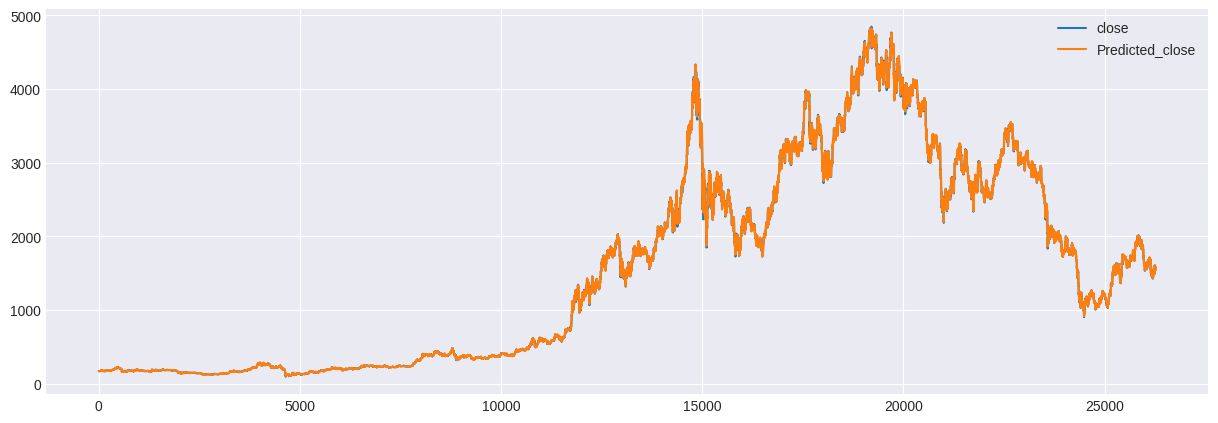

In [46]:
# Plot Actual vs Prediction

train_rf['Predicted_close'] = best_rf_model.predict(X_train)

train_rf[['close','Predicted_close']].plot(figsize=(15, 5))

<Axes: >

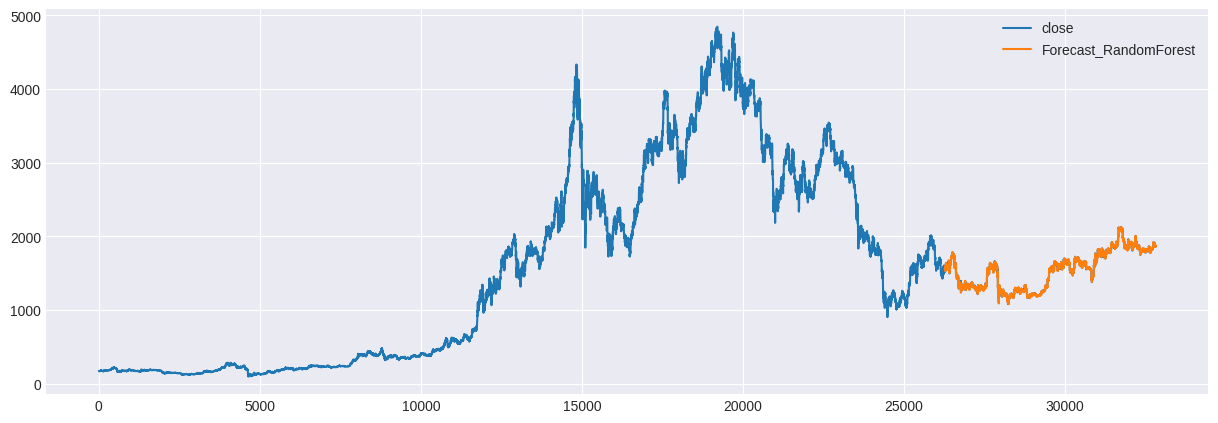

In [49]:
# Plot whole timeframe

test_rf['Forecast_RandomForest'] = best_rf_model.predict(X_test)

overall_data = pd.concat([train_rf, test_rf], sort=False)

overall_data[['close', 'Forecast_RandomForest']].plot(figsize=(15, 5))

In [ ]:
# Results RF Model

test_mae_rf = round(mean_absolute_error(test_rf['close'], test_rf['Forecast_RandomForest']))
test_rmse_rf = round(np.sqrt(mean_squared_error(test_rf['close'], test_rf['Forecast_RandomForest'])))
test_r2_rf = r2_score(test_rf['close'], test_rf['Forecast_RandomForest'])

print(f"test MAE RF : {test_mae_rf}")
print(f"test RMSE RF : {test_rmse_rf}")
print(f"test R2 RF : {test_r2_rf}")

In [53]:
#save your model or results

joblib.dump(best_rf_model, "/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/ETH/rf_grid_eth.pkl")

['/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/ETH/rf_grid_eth.pkl']

In [ ]:
#load your model for further usage

# load_rf = joblib.load("/content/drive/MyDrive/Colab Notebooks/01 Omdena/Bahrain - Crypto/Saved Models/ETH/best_rf_model.pkl")

## Results Modeling

In [51]:
# Overall Results

results = {
    "METRIC": ["MAE", "RMSE", "R2"],
    "RandomForest": [test_mae_rf, test_rmse_rf, test_r2_rf]
}

df_results = pd.DataFrame(results).round(1)
df_results

,METRIC,RandomForest
0,MAE,5.0
1,RMSE,7.0
2,R2,1.0
